In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
dataset_name = 'simulation_levels_of_corr'
config_file = '../dataset_configs/simulation_levels_of_corr_dataset.json'
window_name = 'time_window_2s'

from analysis_config import simulation_window_name_to_frames, simulation_levels_of_corr_distance_window_name_to_sample_size, simulation_levels_of_corr_distance_window_name_to_seed
window = simulation_window_name_to_frames[window_name]
seed = simulation_levels_of_corr_distance_window_name_to_seed[window_name]
sample_size = simulation_levels_of_corr_distance_window_name_to_sample_size[window_name]

import os
fig_dir = f'../figures/{dataset_name}/{window_name}'
os.makedirs(fig_dir, exist_ok=True)

In [36]:
from catrace.run.run_select_assembly import run_select_assembly, RunSelectAssemblyParams
from catrace.dataset import DatasetConfig
from catrace.utils import load_config
dsconfig = load_config(config_file, DatasetConfig)

select_assembly_params = RunSelectAssemblyParams(
    config_file = config_file,
    select_neuron_params = dict(
        cell_type=None,
        odors=dsconfig.odors_stimuli,
        criterium_odors=['odor1', 'odor2'],
        window=[11, 20],
        method='top_indices',
        assembly_size=100
    ),
    overwrite_computation=False,
    parallelism=1
)

select_neuron_dir = run_select_assembly(select_assembly_params)

/tungstenfs/scratch/gfriedri/hubo/Software/python_env/catrace_cpu/lib/python3.10/site-packages/dataclasses_json/core.py:188: RuntimeWarning: 'NoneType' object value of non-optional type cell_type detected when decoding SelectNeuronParams.
  warnings.warn(


In [37]:
assembly_name = os.path.basename(os.path.normpath(select_neuron_dir))

In [38]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [39]:
from catrace.run.run_distance import run_distance, RunDistanceParams, PlotDistanceParams, PlotPerCondMatParams, PlotMeanDeltaMatParams
from catrace.visualize import PlotBoxplotMultiOdorCondParams

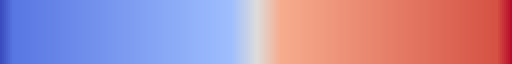

In [40]:
from catrace.visualize import mk_colormap_with_steepness
# Example usage
cmap = mk_colormap_with_steepness('coolwarm', pick_locs=[0.8, 0.4], place_locs=[0.95, 0.1])
cmap

Plotting average trace...
A_1_small None
Computing distance matrices...
Plotting per condition...
{'ncol': 2, 'row_height': 1.35, 'col_width': 1.35, 'title_fontsize': 7, 'colorbar_fontsize': 6, 'ylabel_fontsize': 7, 'ylabels': None, 'ylabel_colors': None, 'cmap': 'turbo', 'clim': None, 'color_norm': None, 'cbar_interval': None}
clim: (0.0, 5.962799135020671)
ylabel_ vfontsize: 7
ylabel_ vfontsize: 7
Plotting delta matrix...
clim: (-0.21245310165914566, 0.21245310165914566)
ylabel_ vfontsize: 7
Plotting vs statistics...


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(


Plotting per fish...


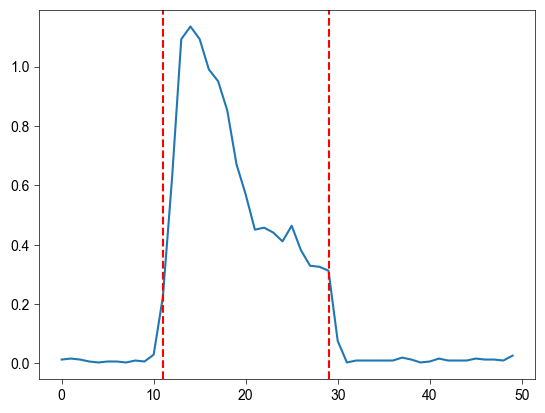

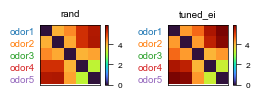

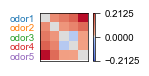

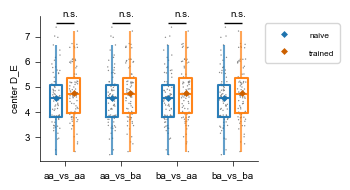

In [41]:
ylabels = None
ylabel_colors = None
plot_params = PlotDistanceParams(
    per_cond = PlotPerCondMatParams(
        row_height=1.35,
        col_width=1.35,
        title_fontsize=7,
        ylabel_fontsize=7,
        ylabel_colors = ylabel_colors,
        ylabels = ylabels,
        cmap='turbo',),
    mean_delta = PlotMeanDeltaMatParams(
        figsize=(1.6, 1.6),
        colorbar_fontsize = 7,
        ylabel_fontsize = 7,
        ylabels = ylabels,
        ylabel_colors = ylabel_colors,
        cmap=cmap,
    )
    )
params = RunDistanceParams(
    config_file = config_file,
    assembly_name = assembly_name, #'assembly_window11to20_top_indices100',
    time_window = window,
    sample_size = sample_size,
    metric = 'center_euclidean',
    seed=seed,
    do_normalize_simdf = False,
    do_reorder_cs=False,
    overwrite_computation = False,
    naive_name='rand',
    do_plot_per_fish = False,
    plot_params = plot_params,
    manifold_level = 'odor',
    num_repeats=50)

if params.assembly_name == '':
    assembly_label = 'all_neurons'
else:
    assembly_label = params.assembly_name
params.summary_name = f'distance_summary_{params.metric}_{assembly_label}_window{params.time_window[0]}to{params.time_window[1]}_norm{params.do_normalize_simdf}'

output_figs, test_results = run_distance(params)

In [42]:
from catrace.for_paper import save_figure_for_paper

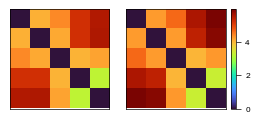

In [43]:
import copy
import os
import matplotlib
from os.path import join as pjoin

def adjust_fig_per_cond(output_figs):
    fig_per_cond_copy = output_figs['fig_per_cond']
    ax = fig_per_cond_copy.get_axes()
    # Remove title for ax[0] and ax[1]
    ax[0].set_title('')
    ax[1].set_title('')
    # Delete y ticks on the second axes
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    # Delete colorbar on the first axes
    fig = fig_per_cond_copy
    fig.delaxes(fig.axes[2])
    fig_per_cond_copy.tight_layout()
    return fig_per_cond_copy

fig_subdir = os.path.join(fig_dir, params.metric)
os.makedirs(fig_subdir, exist_ok=True)
fig_per_cond_copy = adjust_fig_per_cond(output_figs)
save_figure_for_paper(fig_per_cond_copy, f'{dataset_name}_{params.metric}_distance_per_cond', fig_subdir, save_eps=True)
fig_per_cond_copy



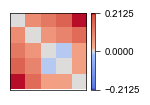

In [44]:
def adjust_fig_delta(output_figs):
    fig_delta_copy = copy.deepcopy(output_figs['fig_delta'])
    ax = fig_delta_copy.get_axes()
    ax[0].set_yticks([])
    fig_delta_copy.tight_layout()
    return fig_delta_copy

fig_delta_copy = adjust_fig_delta(output_figs)
save_figure_for_paper(fig_delta_copy, f'{dataset_name}_{params.metric}_mean_delta', fig_subdir, save_eps=True)
fig_delta_copy

Plotting average trace...
A_1_small None
Computing distance matrices...
Plotting per condition...
{'ncol': 2, 'row_height': 1.36, 'col_width': 1.36, 'title_fontsize': 7, 'colorbar_fontsize': 6, 'ylabel_fontsize': 7, 'ylabels': None, 'ylabel_colors': None, 'cmap': 'turbo', 'clim': None, 'color_norm': None, 'cbar_interval': None}
clim: (5.403819796561265, 2520.4367354798183)
ylabel_ vfontsize: 7
ylabel_ vfontsize: 7
Plotting delta matrix...
clim: (-110.69358151451351, 110.69358151451351)
ylabel_ vfontsize: 7
Plotting vs statistics...


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(


Plotting per fish...


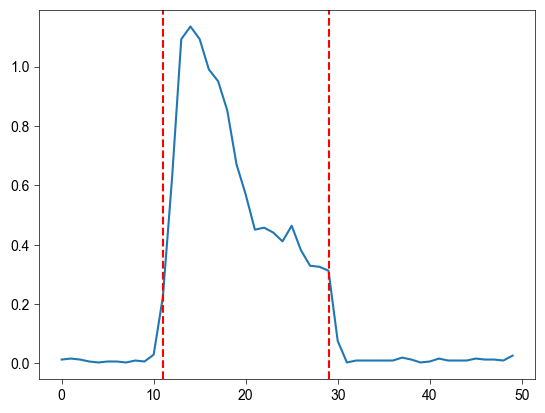

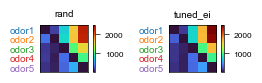

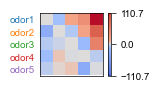

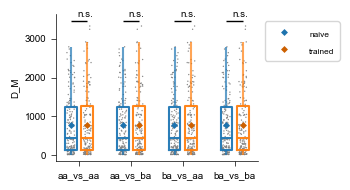

In [45]:
plot_params = PlotDistanceParams(
    per_cond = PlotPerCondMatParams(
        row_height=1.36,
        col_width=1.36,
        title_fontsize=7,
        ylabel_fontsize=7,
        ylabel_colors = None,
        cmap='turbo',
    ),
    mean_delta = PlotMeanDeltaMatParams(
        figsize=(1.7, 1.7),
        colorbar_fontsize = 7,
        ylabel_fontsize = 7,
        ylabels = ylabels,
        ylabel_colors = ylabel_colors,
        cmap=cmap,
    ))
params = RunDistanceParams(
    config_file = config_file,
    assembly_name = assembly_name, #'assembly_window11to20_top_indices100',
    time_window = window,
    sample_size = sample_size,
    metric = 'mahal',
    reg = 1e-5,
    seed=seed,
    do_normalize_simdf = False,
    do_reorder_cs=False,
    overwrite_computation = False,
    naive_name='rand',
    do_plot_per_fish = False,
    plot_params = plot_params,
    manifold_level = 'odor',
    num_repeats=50)

if params.assembly_name == '':
    assembly_label = 'all_neurons'
else:
    assembly_label = params.assembly_name
params.summary_name = f'distance_summary_{params.metric}_{assembly_label}_window{params.time_window[0]}to{params.time_window[1]}_norm{params.do_normalize_simdf}'

output_figs, test_results = run_distance(params)

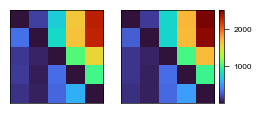

In [46]:
fig_subdir = os.path.join(fig_dir, params.metric)
os.makedirs(fig_subdir, exist_ok=True)
fig_per_cond_copy = adjust_fig_per_cond(output_figs)
save_figure_for_paper(fig_per_cond_copy, f'{dataset_name}_{params.metric}_distance_per_cond', fig_subdir, save_eps=True)
fig_per_cond_copy


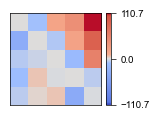

In [47]:
fig_delta_copy = adjust_fig_delta(output_figs)
save_figure_for_paper(fig_delta_copy, f'{dataset_name}_{params.metric}_mean_delta', fig_subdir, save_eps=True)
fig_delta_copy